In [62]:
from sklearn import datasets
import matplotlib.pyplot as plt
X_blob, y_blob = datasets.make_blobs(n_samples=1000, centers=5, n_features=2, random_state=1, cluster_std=0.6)

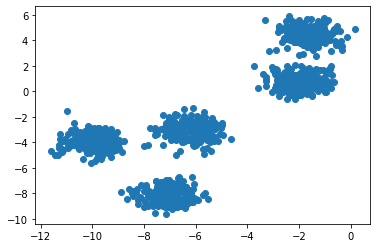

In [63]:
plt.scatter(X_blob[:,0], X_blob[:,1])

In [64]:
"""

K=some value
assign K random clusters
For each point, compute closest cluster
take the average of all the points in a cluster and assign that to be the new center
repeat
"""

import math
import random
import numpy as np
def ndim_distance(a,b):
    subtracted = []
    result = 0
    for i in range(len(a)):
        subtracted.append(a[i]-b[i])
    for i in subtracted:
        result += i*i
    result = math.sqrt(result)
    return result

def ndim_mean(points, dim):

    totalsum = [0,0]
    average = []
    for point in points:
        for i in range(len(point)):
            totalsum[i] += point[i]
    for i, item in enumerate(totalsum):
        average.append(totalsum[i]/len(points))
    return average

def show_centroids(centroids):
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black')
def run_kmeans(X, num_iters, K):
    centers = random.choices(X, k=K)
    for i in range(num_iters):
        closest_cluster_per_points = []
        best_distances_i = []
        for point in X:
            distances = [ndim_distance(point,center) for center in centers]
            best_distance_i = np.argmin(distances)
            best_distances_i.append(best_distance_i)
            closest_cluster_per_points.append(best_distance_i)
        #plt.scatter(X_blob[:,0], X_blob[:,1],c=best_distances_i)
        points_by_cluster = [[] for i in range(K)]
        #print(points_by_cluster)
        for i in range(len(X)):
            points_by_cluster[closest_cluster_per_points[i]].append(X[i])
        for i in range(K):
            #print(points_by_cluster[i])
            if len(points_by_cluster[i])>0:
                centers[i] = ndim_mean(points_by_cluster[i], len(X[0]))
            else:
                print("cluster had 0 points???")
                plt.scatter(X_blob[:,0], X_blob[:,1],c=best_distances_i)
                show_centroids(centers)
                plt.show()

        #print(centers)
        #show_centroids(centers)
    return centers, closest_cluster_per_points
def display_kmeans(X, num_iters, K):
    cents, points_by_cluster = run_kmeans(X, num_iters, K)
    plt.scatter(X[:,0], X[:,1],c=points_by_cluster)
    show_centroids(cents)
    plt.show()
centroids, _ = run_kmeans(X_blob, 100, 3)
del _
    

    



[[-8.102118116933918, -3.499765357198299], [-1.841605569896513, 2.603005932615722], [-7.067498368038465, -8.12644382475476]]


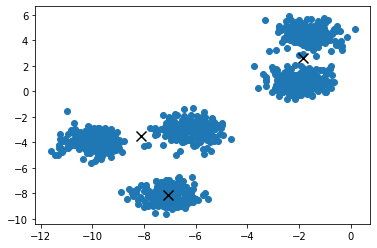

In [65]:
print(centroids)
centroids = np.array(centroids)
plt.scatter(X_blob[:,0], X_blob[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black')



In [66]:

def objective(K, X):
    centroids, closest_cluster_per_points = run_kmeans(X,20, K)
    centroids = np.array(centroids)
    cost = 0
    for j in range(K):
        MSE_this_cluster = 0
        for idx, point in enumerate(X):
            if closest_cluster_per_points[idx] == j:
                MSE_this_cluster += (ndim_distance(point, centroids[j]))**2
        cost += MSE_this_cluster
    return cost


def silhouette(K, X):
    centroids, closest_cluster_per_points = run_kmeans(X,20, K)
    centroids = np.array(centroids)
    cost = 0
    for idx, point in enumerate(X):
        a = []
        b = []
        closest_centroid = 0
        best_centroid_distance = 9999999
        for cidx, centroid in enumerate(centroids):
            
            if ndim_distance(centroids[closest_cluster_per_points[idx]], centroid) < best_centroid_distance and (centroids[closest_cluster_per_points[idx]] != centroid).all():
                closest_centroid = cidx
                best_centroid_distance = ndim_distance(centroids[closest_cluster_per_points[idx]], centroid)
        for idx2, point2 in enumerate(X):
            if idx != idx2:
                
                if closest_cluster_per_points[idx] == closest_cluster_per_points[idx2]: #if they are in the same cluster
                    a.append(ndim_distance(point, point2))
                elif closest_cluster_per_points[idx2] == closest_centroid:
                    b.append(ndim_distance(point, point2))
        a = np.mean(a)
        b = np.mean(b)
        cost += (b-a)/(max(a,b))
    cost /= len(X)
    return cost



            


In [67]:
silhouette(3, X_blob)

0.6481538506669449

  0%|          | 0/9 [00:00<?, ?it/s]

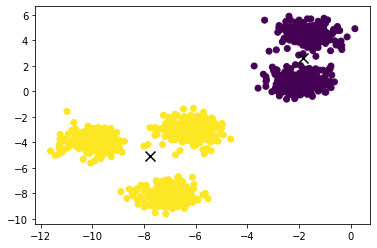

 11%|█         | 1/9 [00:05<00:43,  5.48s/it]

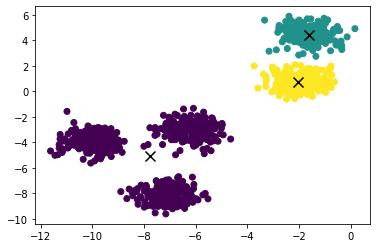

 22%|██▏       | 2/9 [00:09<00:31,  4.53s/it]

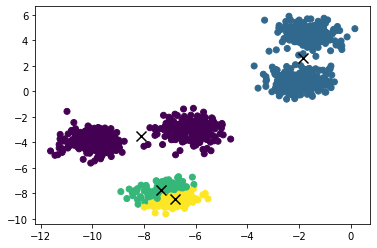

 33%|███▎      | 3/9 [00:12<00:22,  3.81s/it]

cluster had 0 points???


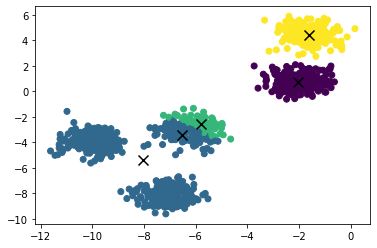

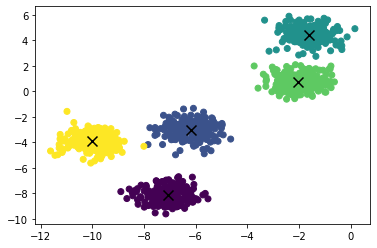

 44%|████▍     | 4/9 [00:16<00:18,  3.80s/it]

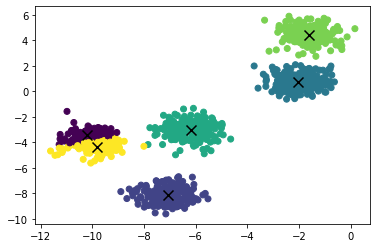

 56%|█████▌    | 5/9 [00:19<00:15,  3.83s/it]

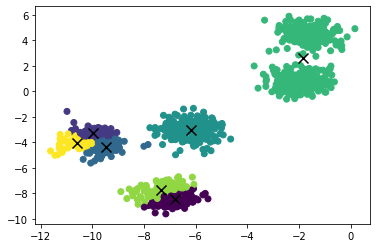

 67%|██████▋   | 6/9 [00:23<00:10,  3.62s/it]

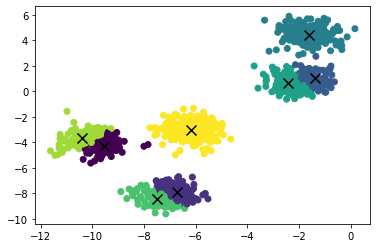

 78%|███████▊  | 7/9 [00:28<00:08,  4.02s/it]

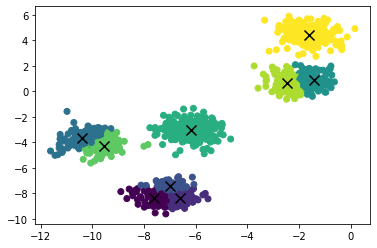

 89%|████████▉ | 8/9 [00:33<00:04,  4.33s/it]

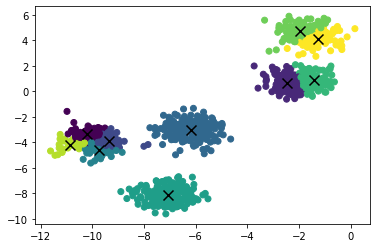

100%|██████████| 9/9 [00:39<00:00,  4.34s/it]


In [68]:
import tqdm
min_k = 2
max_k=10
resulting_costs = ([])
for i in tqdm.trange(min_k, max_k+1):
    resulting_costs.append(silhouette(i,X_blob ))
    display_kmeans(X_blob, 20, i)
    #print(i)


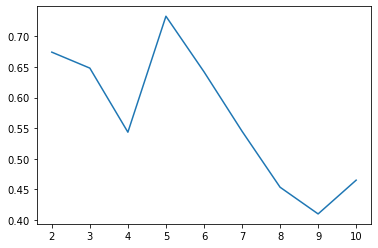

In [69]:
plt.plot(range(min_k, max_k+1), resulting_costs)